In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import scipy
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# slide = 13 + 1/3, 7.5
# factors = 1/3, 1/2
# width, height = [a * b for a, b in zip(factors, (slide))]
wh = 6.5, 4
factor = 2 / 3
width, height = [factor * x for x in wh]

XMIN, XMAX, RESO = -0.5, 1.5, 1000
DELTA = 1e-6

def fig_ax():
    fig, ax = plt.subplots(figsize=(width, height))
    return fig, ax

def plot_prior_posterior(ax):    
    x = np.linspace(XMIN, XMAX, RESO)
    ns = n.pdf(x)
    ax.plot(x, ns / ns.max(), label=r"$p(\theta \, \vert \, x)$")
    us = u.pdf(x)
    ax.plot(x, us, label=r"$p(\theta)$")
    return None

def plot_hatches(ax, cdf, delta=0.0005):
    x = np.linspace(0., 1., RESO)
    ax.fill_between(
        x, 
        y1=1, 
        where=~np.logical_and(0 + delta < cdf(x), cdf(x) < 1 - delta),
        facecolor="none", 
        hatch="xxxx",
        edgecolor="r",
        alpha=0.25,
    )
    return None

def plot_trunc_prior_posterior(ax, cdf, delta=0.0005):
    x = np.linspace(XMIN, XMAX, RESO)
    ns = n.pdf(x)
    ax.plot(x, ns / ns.max(), label=r"$p(\theta \, \vert \, x)$")
    
    us = u.pdf(x)
    ax.plot(x, us, "--", alpha=0.5, label=r"$p(\theta)$")
    
    us = u.pdf(x)
    us = np.where(
        np.logical_and(0 + delta < cdf(x), cdf(x) < 1 - delta),
        us,
        0.0,
    )
    ax.plot(x, us, c='orange', label=r"$p^{\mathrm{new}}(\theta)$")
    return None

def plot_settings(ax):
    ax.legend()
    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False, # labels along the bottom edge are off
        left=False,
        labelleft=False,
    )
    return None

SAVE_KWARGS = dict(
    transparent=True,
    bbox_inches='tight',
)

In [4]:
u = scipy.stats.uniform()
n = scipy.stats.norm(loc=0.675, scale=0.05)

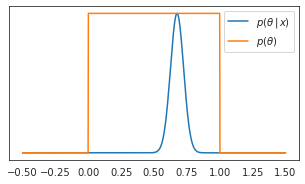

In [5]:
sns.set_style("white")
fig, ax = fig_ax()

plot_prior_posterior(ax)
plot_settings(ax)


fig.tight_layout()
fig.savefig(
    "prior-and-posterior-clean.png",
    **SAVE_KWARGS,
)

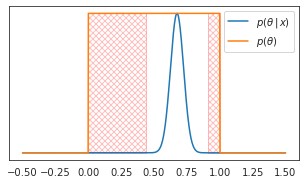

In [6]:
sns.set_style("white")
fig, ax = fig_ax()

plot_prior_posterior(ax)
plot_hatches(ax, n.cdf, delta=DELTA)
plot_settings(ax)

fig.tight_layout()
fig.savefig(
    "prior-and-posterior-hatch.png",
    **SAVE_KWARGS,
)

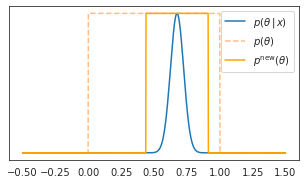

In [7]:
sns.set_style("white")
fig, ax = fig_ax()

plot_trunc_prior_posterior(ax, n.cdf, delta=DELTA)
plot_settings(ax)


fig.tight_layout()
fig.savefig(
    "prior-and-posterior-trunc.png",
    **SAVE_KWARGS,
)